In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
file_path = "/content/spam detection.csv"
df = pd.read_csv(file_path, encoding='latin-1')


In [17]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [26]:
data = pd.read_csv("/content/spam detection.csv", usecols=[0, 1], names=['label', 'message'], skiprows=1, encoding='latin-1')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

In [28]:
#Convert the text into bag-of-words representation means frequency representations of text data, where the order of words doesn’t matter.
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [29]:
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

MultinomialNB()

In [32]:
from pandas import DataFrame
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = DataFrame(report_dict).transpose()
print("Classification Report:")
print(report_df)


Classification Report:
              precision    recall  f1-score      support
ham            0.983028  0.996559  0.989747  1453.000000
spam           0.974874  0.885845  0.928230   219.000000
accuracy       0.982057  0.982057  0.982057     0.982057
macro avg      0.978951  0.941202  0.958988  1672.000000
weighted avg   0.981960  0.982057  0.981689  1672.000000


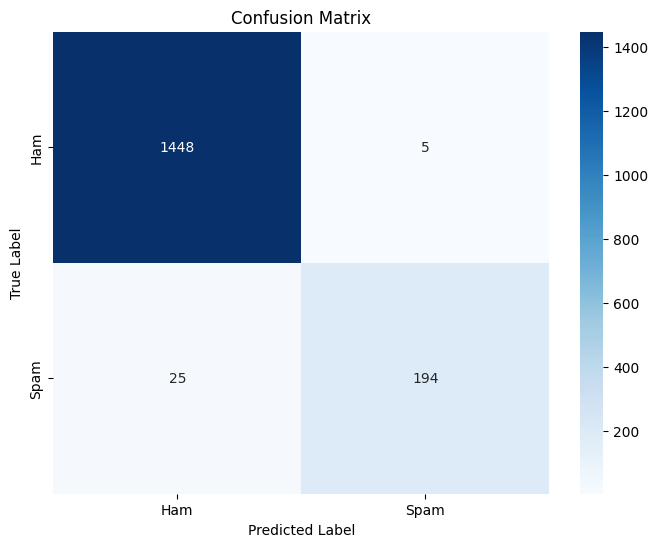

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# I used Naive Bayes Classifier for the SMS Spam Detection project because it is:-
# 1.It is easy to implement and efficient
# 2.works well with text means (effective for text classification problems because it can handle a large number of features (like word occurrences) efficiently)
#Overall,
#Naive Bayes is a strong baseline method for text classification tasks like spam detection, providing a good balance of simplicity, speed, and effectiveness.
#The Naive Bayes classifier is a simple, fast algorithm that uses Bayes'. Theorem to predict the probability of a class (like spam or ham) based on input features (like words in a message). It's called "naive" because it assumes all features are independent of each other. Despite this simplification, it works well for tasks like text classification, especially when speed and simplicity are important.

# *Outcome of the confusion matrix:
#True Positives (Spam correctly identified): 194
#False Positives (Ham incorrectly identified as Spam): 5
#False Negatives (Spam incorrectly identified as Ham): 25
#True Negatives (Ham correctly identified): 1448


#The test and training split in SMS spam detection involves dividing the dataset into two parts: a training set used to train the model and a test set used to evaluate its performance, ensuring the model's effectiveness on unseen data.

# * MultinomialNB is a type of Naive Bayes classifier specifically designed for discrete data, commonly used for text classification tasks like SMS spam detection, where the features represent word counts or frequencies.
